In [1]:
# use gpd_2023 environment

import sys

import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
#import seaborn as sns
import pickle
#import torch

import cv2
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#sys.path.insert(0, "/home/projects/ku_00017/people/simpol/scripts/conflictNet/src/utils")
sys.path.insert(0, "/home/simon/Documents/scripts/conflictNet/src/utils")

In [2]:
print(np.__version__)
print(cv2.__version__)
print(gpd.__version__)

1.22.3
4.6.0
0.12.2


In [3]:
# for the patches thing you really only need the views_vol

def get_data():

    local_dir_pro = '/home/simon/Documents/scripts/conflictNet/data/processed'


    with open(f'{local_dir_pro}/viewser_monthly_vol_test_sbnsos.pkl', 'rb') as file: 
        views_vol = pickle.load(file)

    return views_vol


#index_dict = {'pg_id' : 0, 'xcoord' : 1, 'ycoord' : 2, 'month_id' : 3, 'c_id' : 4, 'ln_sb_best' : 5, 'ln_ns_best' : 6, 'ln_os_best': 7}


In [4]:
def sum_months(views_vol):

    # Sum the three violence types
    summed_violence = views_vol[:, :, :, 5:].sum(axis=3)

    # Define the groups
    group_slices = [(0, 62), (62, 124), (124, 186), (186, 248), (248, 310), (310, 372)]

    # Calculate the sum for each group
    v_sums = [summed_violence[start:end, :, :].sum(axis=0) for start, end in group_slices]

    return v_sums

In [5]:
def plot_world_maps(v_sums, world, save=False):

    for i in range(len(v_sums)):   

        extent = (-25.75, 63.75, -46.75, 42.75)
        # Create the figure and axis
        fig, ax = plt.subplots(figsize=(30, 20))    

        # Plot the world map
        world.plot(ax=ax, color='none', edgecolor='black')

    # Set vmin and vmax for the image
        vmin = 0
        vmax = np.sqrt(v_sums[i].max())

        ax.imshow(np.sqrt(v_sums[i]), extent=extent, vmin=vmin, vmax=vmax, cmap='rainbow', alpha=1)
        # ax.autoscale(tight=True)



        # Remove borders and ticks
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)


        if save:
            plt.savefig(f'/home/simon/Documents/scripts/conflictNet/reports/plots/zstack_{i}.svg', dpi=300, bbox_inches='tight')

        plt.show()

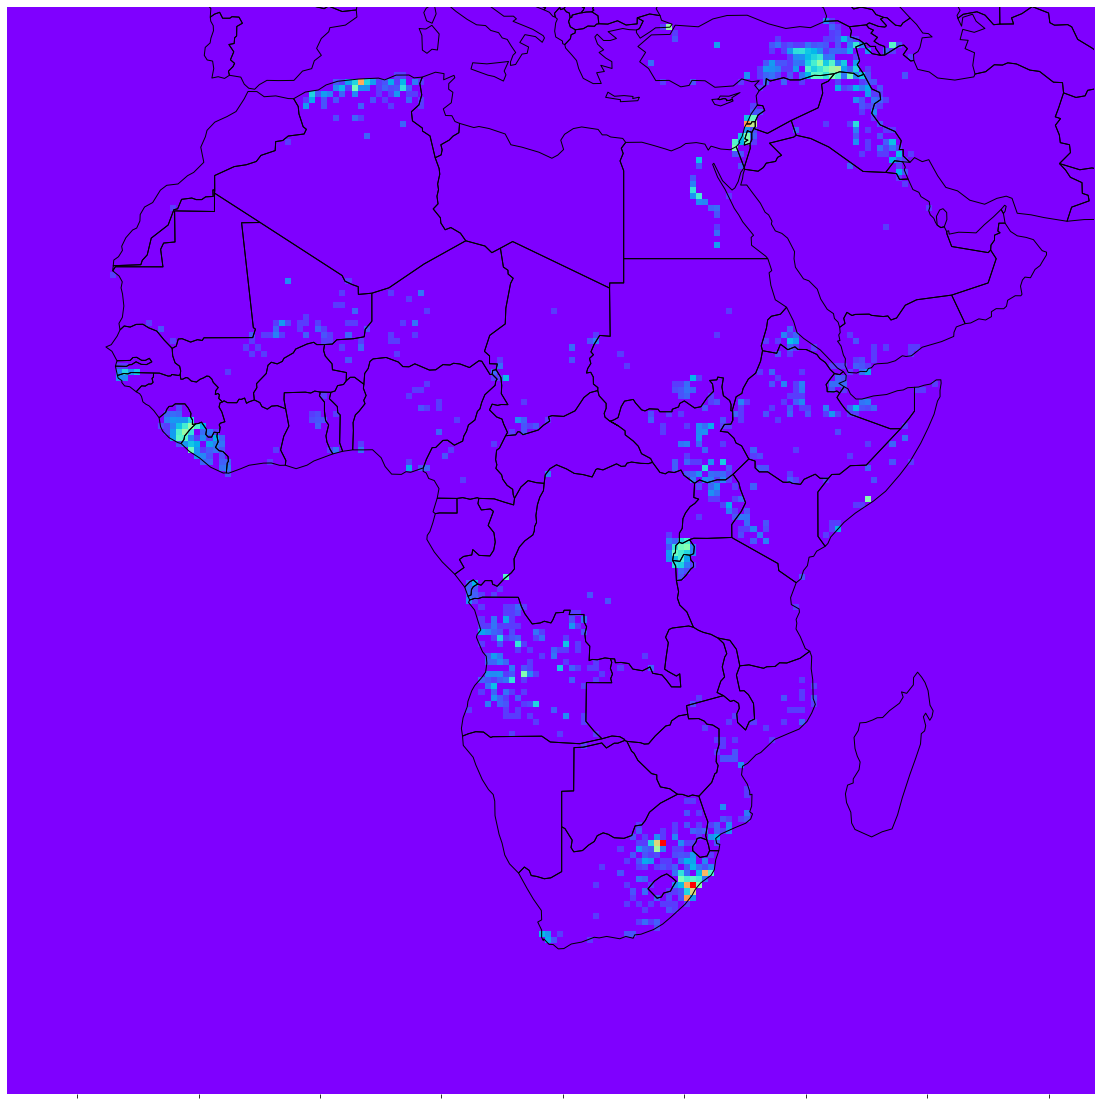

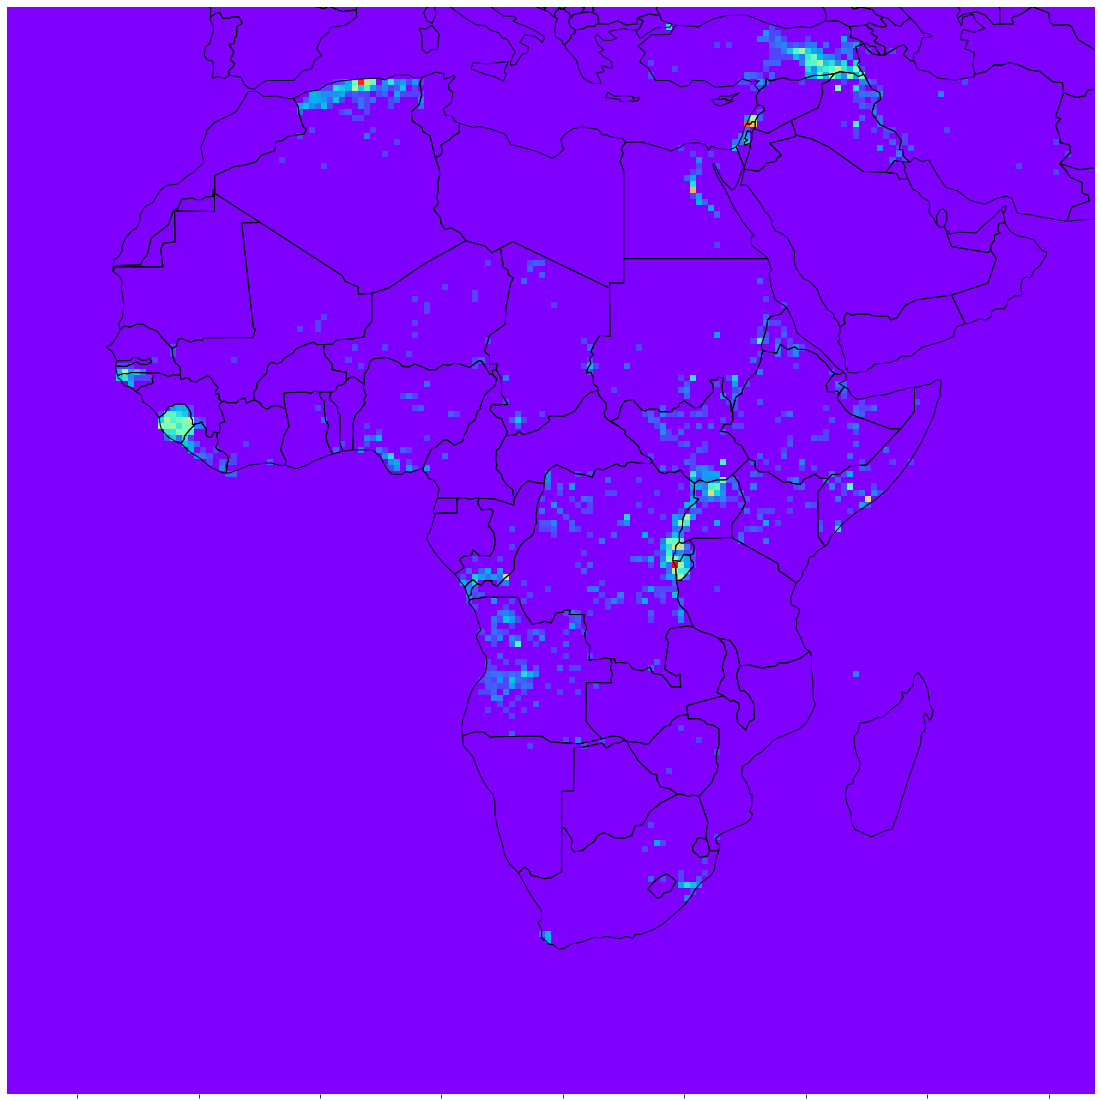

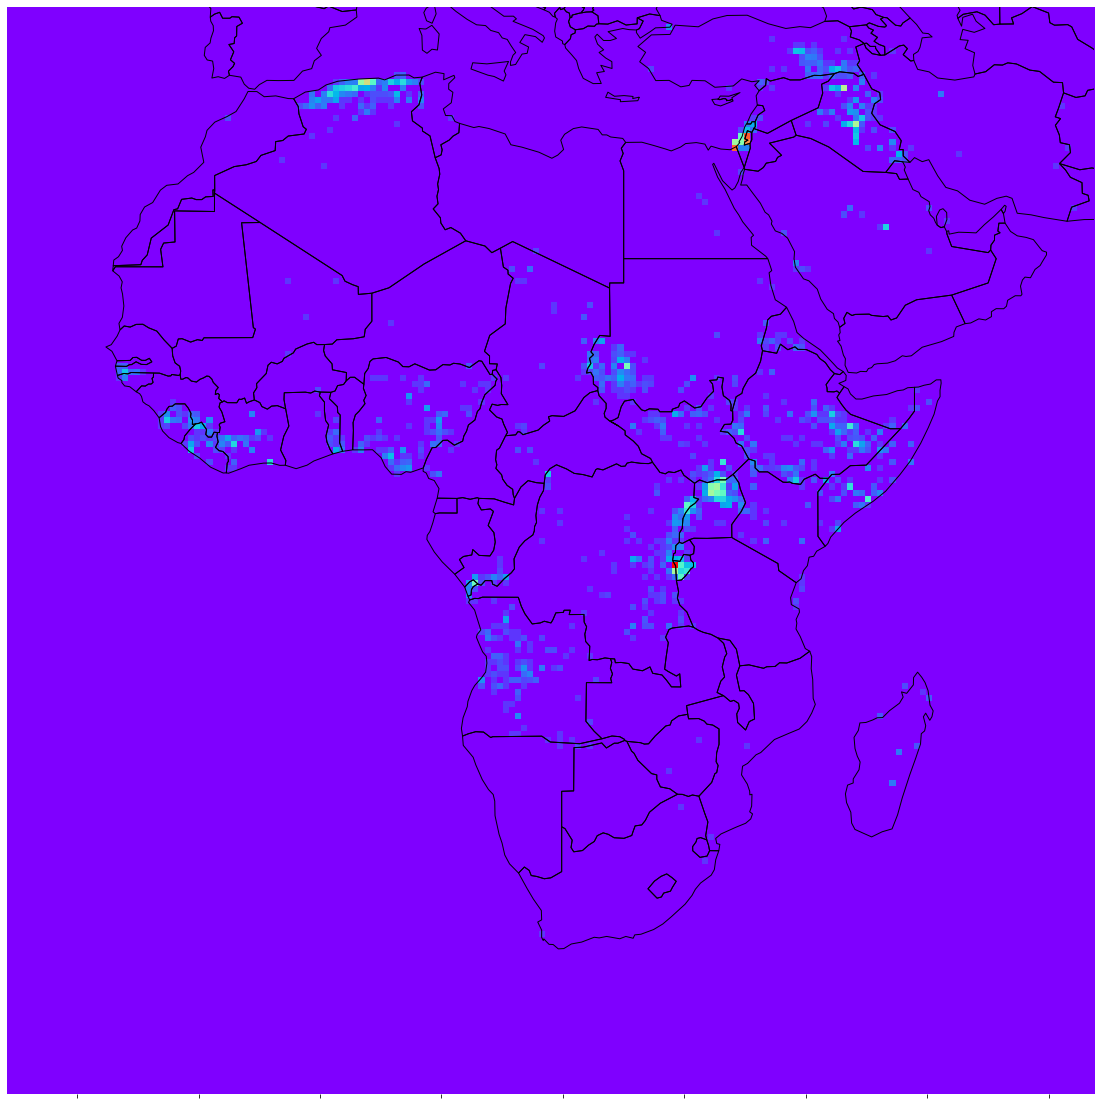

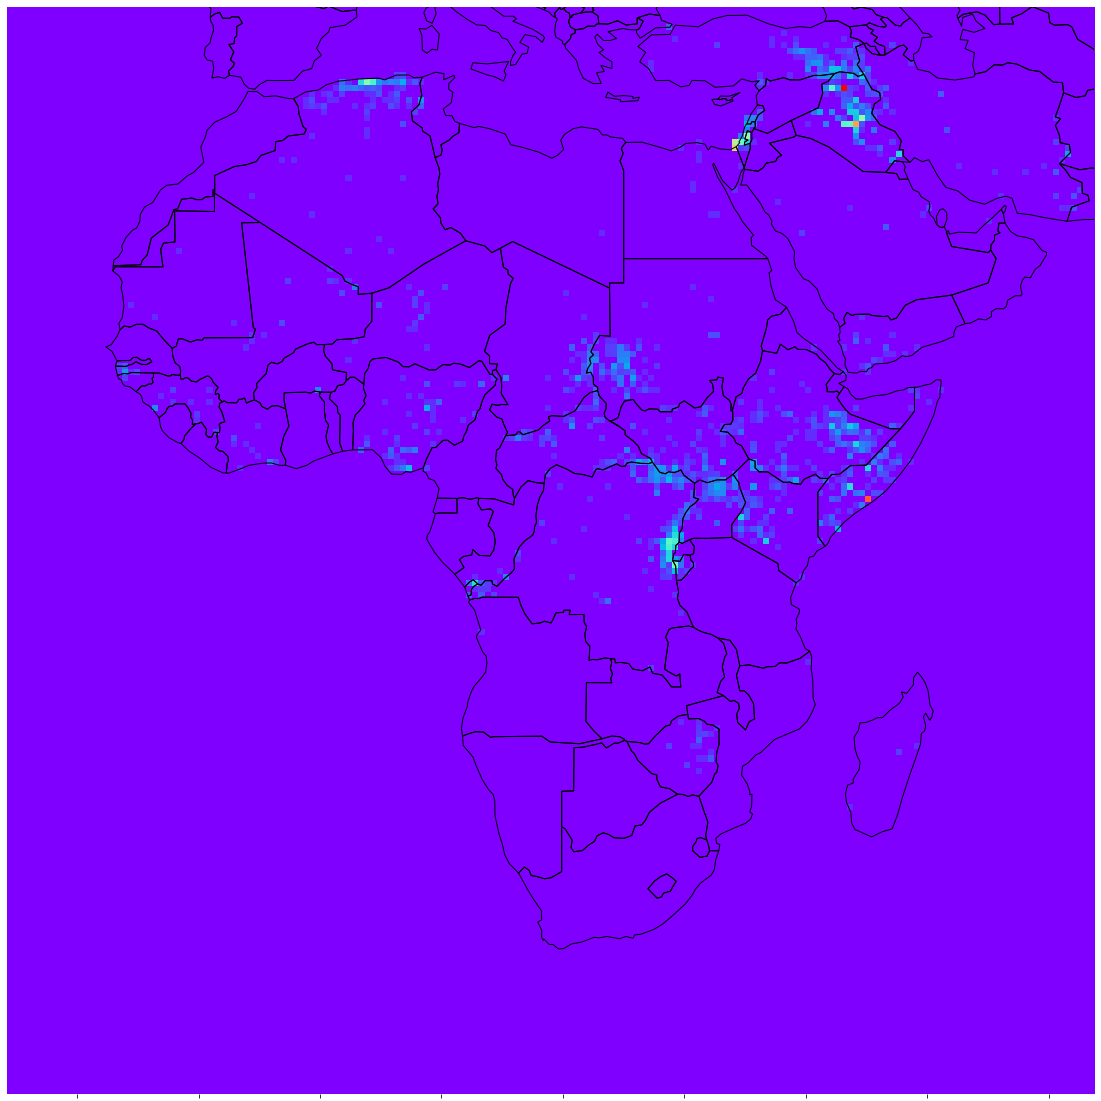

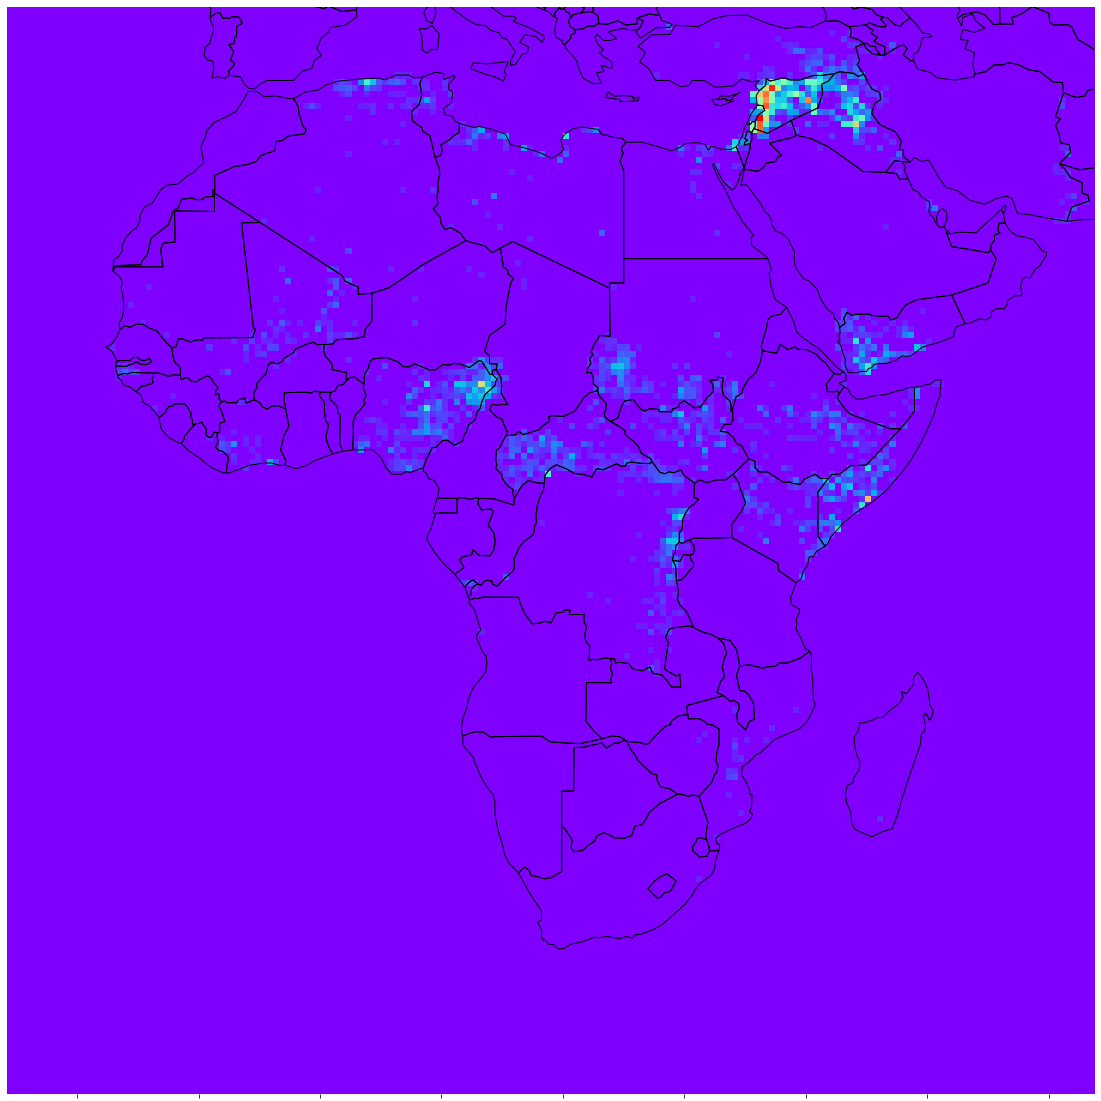

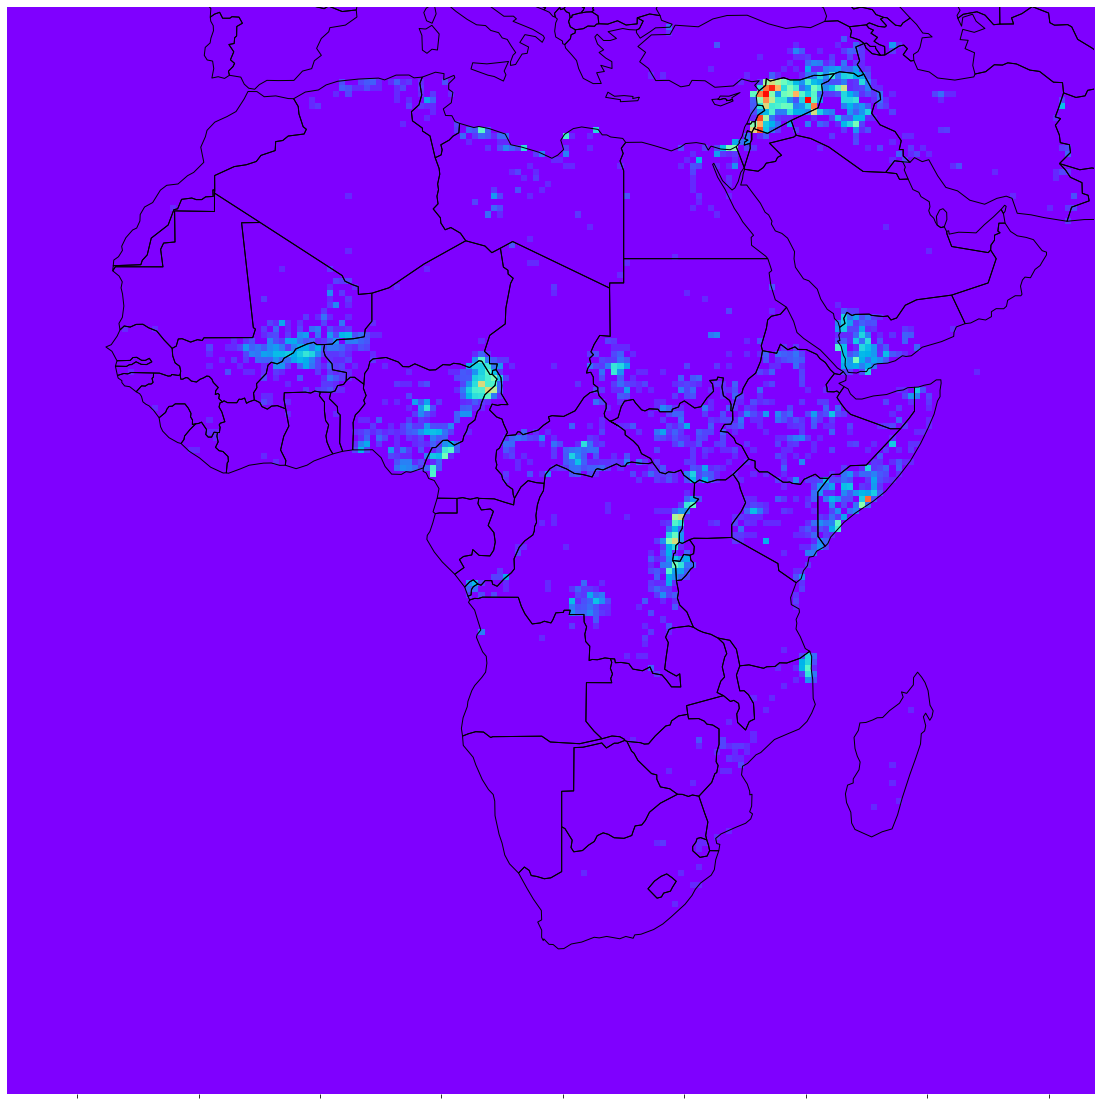

In [6]:
views_vol = get_data()
v_sums = sum_months(views_vol)
plot_world_maps(v_sums, world, save=True)